In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


Mean Squared Error:  588270.9984157211
Mean Absolute Error:  513.1361724146224
R-squared Score:  0.9126476890019245
Mean Absolute Percentage error:  3.3923343615332913


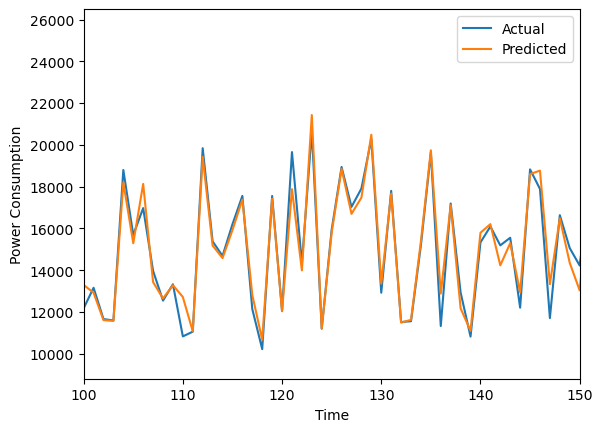

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import matplotlib.pyplot as plt

# Reading the dataset
df = pd.read_csv('/kaggle/input/hourly-energy-consumption/AEP_hourly.csv')

# Converting the datetime column to pandas datetime format
df['datetime'] = pd.to_datetime(df['Datetime'])

# Extracting year, month, day, hour from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['year', 'month', 'day', 'hour']], df['AEP_MW'], test_size=0.4, random_state=10)

# Creating a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=10)

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Predicting the power consumption for test data
y_pred = rf.predict(X_test)

# Calculating the mean squared error and r-squared score for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Printing the mean squared error and r-squared score for the model
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R-squared Score: ', r2)
print('Mean Absolute Percentage error: ',mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred))

# Plotting the actual and predicted power consumption values for test data
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlim(100,150)
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()


# plt.plot(y_test.values, label='Actual')
# plt.xlabel('Time')
# plt.ylabel('Power Consumption')
# plt.legend()
# plt.show()


# plt.plot(y_pred, label='Predicted',color='orange')
# plt.xlabel('Time')
# plt.ylabel('Power Consumption')
# plt.legend()
# plt.show()